In [1]:
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
data  = pd.read_excel('./data/data.xls',usecols=[0,1,2,3,4,5,7])
data_d = data.describe().reset_index()
data_n = data.nunique().reset_index().T
fig = make_subplots(
    rows=3, cols=1,
    specs=[[{"type": "table"}],[{"type": "table"}],[{"type": "table"}]]
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['','肝气郁结证型系数', '热毒蕴结证型系数', '冲任失调证型系数', '气血两虚证型系数', '脾胃虚弱证型系数', '肝肾阴虚证型系数'],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[data_d[k].tolist() for k in data_d.columns],
            align = "left")
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['肝气郁结证型系数', '热毒蕴结证型系数', '冲任失调证型系数', '气血两虚证型系数', '脾胃虚弱证型系数', '肝肾阴虚证型系数'],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[data[k].tolist() for k in data.columns[1:]],
            align = "left"),
             name= '1'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=[data_n[k].tolist()[:1] for k in data_n.columns],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[data_n[k].tolist()[1:] for k in data_n.columns],
            align = "left")
    ),
    row=3, col=1
)

fig.update_layout(
    height=1000,
    showlegend=False,
    title_text="中医证型关联挖掘: 1-图表 2-描述统计 3-去重值"

)

fig.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   肝气郁结证型系数  930 non-null    float64
 1   热毒蕴结证型系数  930 non-null    float64
 2   冲任失调证型系数  930 non-null    float64
 3   气血两虚证型系数  930 non-null    float64
 4   脾胃虚弱证型系数  930 non-null    float64
 5   肝肾阴虚证型系数  930 non-null    float64
 6   TNM分期     930 non-null    object 
dtypes: float64(6), object(1)
memory usage: 51.0+ KB


In [4]:
data.columns

Index(['肝气郁结证型系数', '热毒蕴结证型系数', '冲任失调证型系数', '气血两虚证型系数', '脾胃虚弱证型系数', '肝肾阴虚证型系数',
       'TNM分期'],
      dtype='object')

In [5]:
data_x = data[['肝气郁结证型系数', '热毒蕴结证型系数', '冲任失调证型系数', '气血两虚证型系数', '脾胃虚弱证型系数', '肝肾阴虚证型系数']]

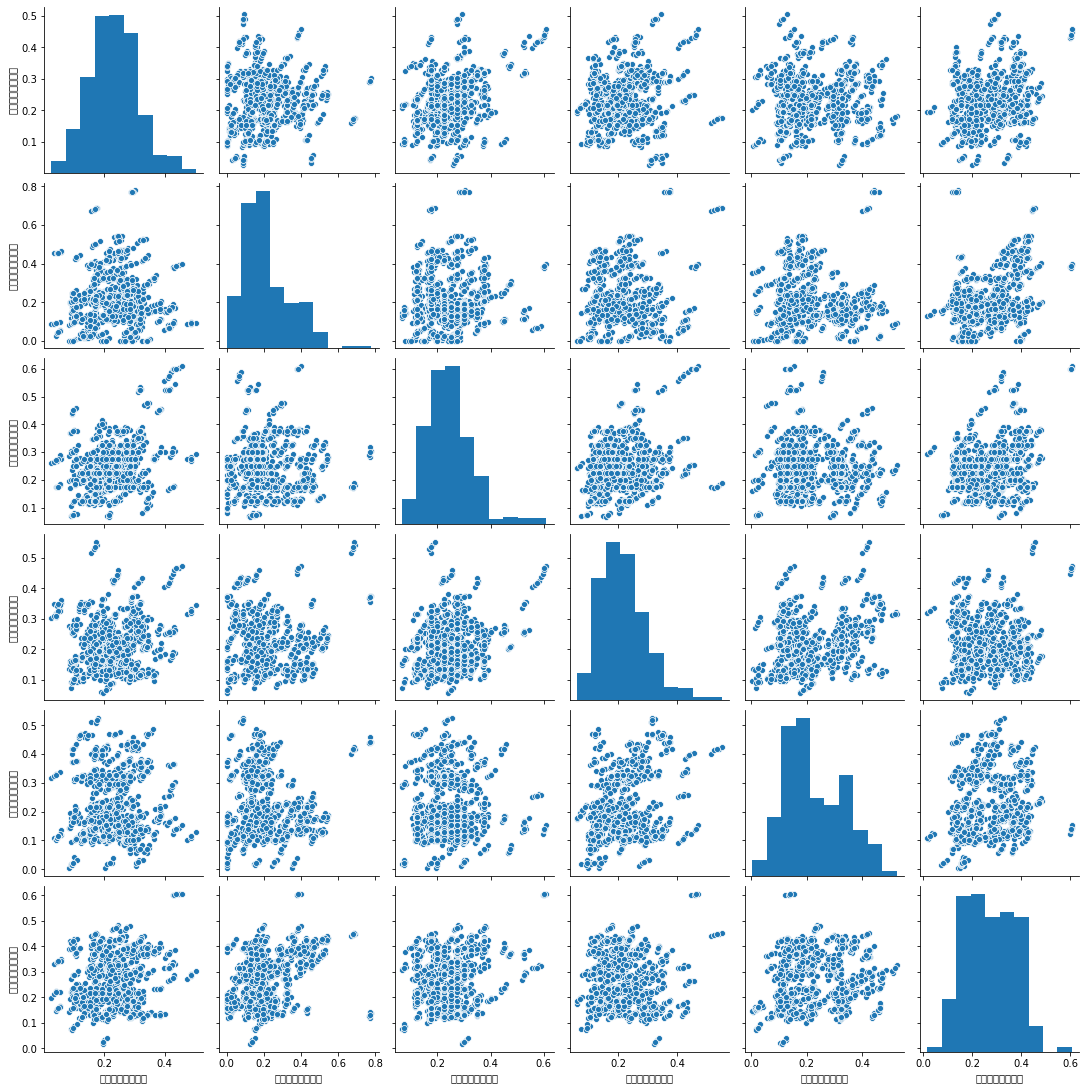

In [6]:
sns.pairplot(data)


In [7]:
def plot_violin(i):
    print(i)
    fig = px.violin(data, y=i, x='TNM分期', color='TNM分期',box=True, points="all", hover_data=data_x.columns)
    fig.show()
    
for i in data_x.columns[:-1]:
    plot_violin(i)

肝气郁结证型系数


热毒蕴结证型系数


冲任失调证型系数


气血两虚证型系数


脾胃虚弱证型系数


In [8]:
color_m = data['TNM分期'].map({"H1":1,"H2":2,"H3":3,"H4":4})

fig = px.parallel_coordinates(data, color=color_m, labels={"肝气郁结证型系数": "'肝气郁结证型系数",
                  "热毒蕴结证型系数": "热毒蕴结证型系数", "冲任失调证型系数": "冲任失调证型系数","气血两虚证型系数":"气血两虚证型系数",
                  "脾胃虚弱证型系数": "脾胃虚弱证型系数", "肝肾阴虚证型系数": "肝肾阴虚证型系数", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [9]:
fig = px.box(data_x, y=data_x.columns,color=data['TNM分期'])
fig.show()

In [10]:
data.groupby('TNM分期').size()

TNM分期
H1    105
H2    205
H3    205
H4    415
dtype: int64

In [11]:
#数据离散化处理
from __future__ import print_function
from sklearn.cluster import KMeans #使用K-means算法

processdfile = './data/data_processed.xls'
typelabel = {
    '肝气郁结证型系数':'A',
    '热毒蕴结证型系数':'B',
    '冲任失调证型系数':'C',
    '气血两虚证型系数':'D',
    '脾胃虚弱证型系数':'E',
    '肝肾阴虚证型系数':'F',
}

k = 4 #需要聚类的类别数

data2 = pd.read_excel('./data/data.xls')
keys = list(typelabel.keys())
result = pd.DataFrame()

if __name__ == '__main__':
    for i in range(len(keys)):
        print('正在进行"%s"的聚类。。。'%keys[i])
        kmodel = KMeans(n_clusters=k,n_jobs=4)
        kmodel.fit(data2[[keys[i]]].values)
        r1 = pd.DataFrame(kmodel.cluster_centers_,columns=[typelabel[keys[i]]])#查看中心
        r2 = pd.Series(kmodel.labels_).value_counts()#各样本对应类别
        r2 = pd.DataFrame(r2,columns=[typelabel[keys[i]]+'n'])
        r = pd.concat([r1,r2],axis=1).sort_values(typelabel[keys[i]])
        r.index = [1,2,3,4]
        r[typelabel[keys[i]]] = r[typelabel[keys[i]]].rolling(2).mean()
        r[typelabel[keys[i]]][1] = 0.0
        result =result.append(r.T)
    result = result.sort_index()
    result.to_excel(processdfile)

正在进行"肝气郁结证型系数"的聚类。。。
正在进行"热毒蕴结证型系数"的聚类。。。
正在进行"冲任失调证型系数"的聚类。。。
正在进行"气血两虚证型系数"的聚类。。。
正在进行"脾胃虚弱证型系数"的聚类。。。
正在进行"肝肾阴虚证型系数"的聚类。。。


In [12]:
data3 = pd.read_excel('./data/data_processed.xls',index_col=0)
data3

,1,2,3,4
A,0,0.180117,0.258788,0.352175
An,248,351.000000,278.000000,53.000000
B,0,0.150766,0.296631,0.489705
Bn,325,396.000000,180.000000,29.000000
C,0,0.201745,0.288202,0.423008
Cn,296,393.000000,206.000000,35.000000
D,0,0.172505,0.252279,0.359726
Dn,283,379.000000,224.000000,44.000000
E,0,0.154479,0.259118,0.377000
En,285,308.000000,246.000000,91.000000


In [13]:
data

,肝气郁结证型系数,热毒蕴结证型系数,冲任失调证型系数,气血两虚证型系数,脾胃虚弱证型系数,肝肾阴虚证型系数,TNM分期
0,0.056,0.460,0.281,0.352,0.119,0.350,H4
1,0.488,0.099,0.283,0.333,0.116,0.293,H4
2,0.107,0.008,0.204,0.150,0.032,0.159,H4
3,0.322,0.208,0.305,0.130,0.184,0.317,H4
4,0.242,0.280,0.131,0.210,0.191,0.351,H4
...,...,...,...,...,...,...,...
925,0.284,0.018,0.250,0.103,0.072,0.121,H1
926,0.103,0.216,0.185,0.166,0.204,0.196,H1
927,0.287,0.163,0.225,0.114,0.103,0.292,H1
928,0.296,0.263,0.175,0.215,0.103,0.187,H1


In [14]:
def replace_num(cols,num,data3):
    typelabel = {
    '肝气郁结证型系数':'A',
    '热毒蕴结证型系数':'B',
    '冲任失调证型系数':'C',
    '气血两虚证型系数':'D',
    '脾胃虚弱证型系数':'E',
    '肝肾阴虚证型系数':'F',
}
    x = typelabel[cols]
    bins = list(data3.loc[x])
    if bins[0]<num<bins[1]:
        return '%s1'%x
    elif bins[1]<num<bins[2]:
        return '%s2'%x
    elif bins[2]<num<bins[3]:
         return '%s3'%x
    else:
        return '%s4'%x

In [15]:
for i in data.columns:
    if i == 'TNM分期':
        break
    for j in range(len(data)):
        data[i][j] = replace_num(i,data[i][j],data3)

In [16]:
data

,肝气郁结证型系数,热毒蕴结证型系数,冲任失调证型系数,气血两虚证型系数,脾胃虚弱证型系数,肝肾阴虚证型系数,TNM分期
0,A1,B3,C2,D3,E1,F3,H4
1,A4,B1,C2,D3,E1,F3,H4
2,A1,B1,C2,D1,E1,F1,H4
3,A3,B2,C3,D1,E2,F3,H4
4,A2,B2,C1,D2,E2,F3,H4
...,...,...,...,...,...,...,...
925,A3,B1,C2,D1,E1,F1,H1
926,A1,B2,C1,D1,E2,F2,H1
927,A3,B2,C2,D1,E1,F3,H1
928,A3,B2,C1,D2,E1,F2,H1


In [17]:
fig = px.parallel_categories(data.iloc[:,:], color = color_m,color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [18]:
#data.to_csv('a3.txt',index=False,header=False)

In [19]:
#!pip install apriori

In [20]:
from apriori import *
import time

In [21]:
inputfile = 'a3.txt'
data = pd.read_csv(inputfile,header=None,dtype=object)

In [22]:
start = time.time()
print('转化数据矩阵...'+'\n')
ct = lambda x : pd.Series(1, index= x[pd.notnull(x)])
b = map(ct,data.values)
data = pd.DataFrame(b).fillna(0)
end = time.time()
print('转换完毕用时%0.2f秒'%(end - start))
del b

support = 0.06
confidence = 0.75

ms = '---'
start = time.time()
print('开始搜索关联规则。。。')
result = find_rule(data,support,confidence,ms)
end = time.time()
print('搜索完成，共计用时%0.2f秒'%(end - start))

转化数据矩阵...

转换完毕用时0.33秒
开始搜索关联规则。。。

正在进行第1次搜索...
数目：276...

正在进行第2次搜索...
数目：947...

正在进行第3次搜索...
数目：42...

结果为：
                    support  confidence
A3---F4---H4       0.079570    0.880952
C3---F4---H4       0.075269    0.875000
B2---F4---H4       0.061290    0.791667
C2---E3---D2       0.092473    0.761062
D2---F3---H4---A2  0.062366    0.753247
A2---E3---D2       0.072043    0.752809
搜索完成，共计用时2.88秒


In [23]:
#根据计算结果，丢弃以非”TNM分期“结尾的规则，最终得到3条有效规则，

In [24]:
result

,support,confidence
A3---F4---H4,0.079570,0.880952
C3---F4---H4,0.075269,0.875000
B2---F4---H4,0.061290,0.791667
C2---E3---D2,0.092473,0.761062
D2---F3---H4---A2,0.062366,0.753247
A2---E3---D2,0.072043,0.752809


In [25]:
result = result.iloc[:3].reset_index()
fanwei=result['index'].str.split("---",expand=True)
result['范围标示1'] = fanwei[0]
result['范围标示2'] = fanwei[1]
del result['index']
result = result.rename(columns={'support':'支持度','confidence':'置信度'})
order = ['范围标示1','范围标示2','支持度','置信度']
result = result[order]
result['支持度'] =result['支持度']*100
result['置信度'] =result['置信度']*100
result['Y'] = 'H4'

In [26]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "table"}]]
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['范围标示1(X)','范围标示2(X)','支持度（%）','置信度（%）','Y'],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[result[k].tolist() for k in result.columns],
            align = "left")
    ),
    row=1, col=1
)

fig.update_layout(
    height=300,
    showlegend=False,
    title_text="中医证型关联挖掘: 规则"

)

fig.show()